<a href="https://colab.research.google.com/github/adamrhurley/FYP/blob/main/MusicRecommenderSystem/corrWithModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reference https://github.com/akshaykadu123/Recommender-system-using-Pearson-Correlation-and-movie-ratings/blob/master/Recommendation%20System.ipynb

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving artists.dat to artists.dat
Saving user_artists.dat to user_artists.dat


In [ ]:
import io
numPlays = pd.read_csv(io.BytesIO(uploaded['user_artists.dat']), sep='\t')
artists = pd.read_csv(io.BytesIO(uploaded['artists.dat']), sep='\t',usecols=['id','name'])

#data = pd.read_csv(io.BytesIO(uploaded['userAndArtists.csv']))
#userArtists = pd.read_csv(io.BytesIO(uploaded['userArtists.csv']))
#artists = pd.read_csv(io.BytesIO(uploaded['artists.csv']))


In [ ]:
data = pd.merge(
  artists, numPlays,
  how="inner",
  left_on="id",
  right_on="artistID"
)

In [ ]:
data = data.rename(columns={"weight": "plays"})

In [ ]:
data.head()

,id,name,userID,artistID,plays
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152


In [ ]:
artists.head()

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [ ]:
#data = pd.merge(userArtists, artists, on='artistID')

In [ ]:
#data.columns = ["userID","artistID","name","plays"]

In [ ]:
#data = data[data['plays'] > 100]

In [ ]:
data.tail(1000)

,id,name,userID,artistID,plays
91834,17615,Bill Cosby,1918,17615,18
91835,17616,Richard Pryor,1918,17616,17
91836,17616,Richard Pryor,1929,17616,1086
91837,17617,Matt Skiba,1918,17617,16
91838,17618,Pablo Francisco,1918,17618,13
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
#from google.colab import  drive
#drive.mount('/drive')

In [ ]:
#data.to_csv('/drive/My Drive/LastFM/data.csv')

In [ ]:
#data.head()

In [ ]:
data.groupby('name')['plays'].mean().head()

name
!!!             1413.000
!DISTAIN         628.500
!deladap          65.000
#####            463.375
#2 Orchestra     144.000
Name: plays, dtype: float64

In [ ]:
data.groupby('name')['plays'].mean().sort_values(ascending=False).head()

name
Viking Quest       35323.0
Tyler Adam         30614.0
Rytmus             23462.0
Johnny Hallyday    16497.5
Dicky Dixon        15345.0
Name: plays, dtype: float64

In [ ]:
data.groupby('name')['plays'].count().sort_values(ascending=False).head()

name
Lady Gaga         611
Britney Spears    522
Rihanna           484
The Beatles       480
Katy Perry        473
Name: plays, dtype: int64

In [ ]:
plays_mean_count = pd.DataFrame(data.groupby('name')['plays'].mean())

In [ ]:
plays_mean_count['plays_counts'] = pd.DataFrame(data.groupby('name')['plays'].count())

In [ ]:
plays_mean_count.head()

,plays,plays_counts
name,,
!!!,1413.000,2
!DISTAIN,628.500,2
!deladap,65.000,1
#####,463.375,8
#2 Orchestra,144.000,1


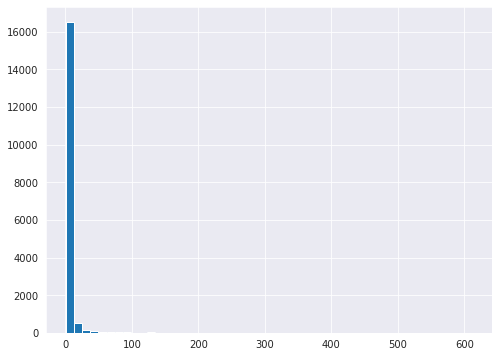

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plays_mean_count['plays_counts'].hist(bins=50)

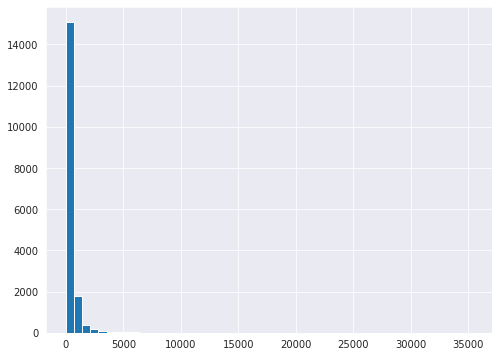

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plays_mean_count['plays'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

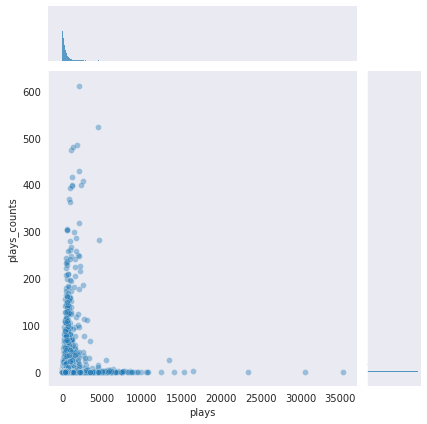

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='plays', y='plays_counts', data=plays_mean_count, alpha=0.4)

In [ ]:
user_artist_plays = data.pivot_table(index='userID', columns='name', values='plays')

In [ ]:
user_artist_plays.head()

name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,(hed) Planet Earth,(sic)monic,*NSYNC,+44,+\-,-123 min.,-OZ-,-t de sangre,...And The Earth Swarmed With Them,...And You Will Know Us by the Trail of Dead,.38 Special,.crrust,06 Children Of The Cross,08001,1-800-ZOMBIE,10 Years,10-20 БЕЗ ВЫХОДНЫХ,100 Bitches,1000names,100DEADRABBITS!!!,100blumen,100dBs,10cc,11.43,110,112,1125,12 Rounds,12 Stones,120 Days,...,박정현,반야,배치기,백지영,비,빅뱅,샤이니,샤이니 (SHINee),서태지,소녀시대,소녀시대 ＆ 2PM,손담비,송지은,승리,시크릿,신화,아웃사이더,아이비,애프터 스쿨(After School),엠블랙(MBLAQ),원더걸스,윤하,이박사,이수영(여),이수영(여);,이정현,이효리,장근석,제빵왕,태양,티아라,현아,ＬｕＬｕ,ＭＡＮＮＥＱＵＩＮ,ＰＥＲＥＳＴＲＯＩＫＡ,ＲＥＤ,ＶａｎｅｓｓＡ,ｂｏｏｇｉｅｍａｎ,ｂｏｒｎ,ｍａｃｈｉｎｅ
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
artist_ratings = user_artist_plays["Martin Solveig"]

In [ ]:
artist_ratings.head()

userID
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
Name: Martin Solveig, dtype: float64

In [ ]:
similar_artists = user_artist_plays.corrwith(artist_ratings)

corr_artist_ratings = pd.DataFrame(similar_artists, columns=['Correlation'])
corr_artist_ratings.dropna(inplace=True)
corr_artist_ratings.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
name,
Arctic Monkeys,1.000000
Armand van Helden,1.000000
Crystal Castles,1.000000
Daft Punk,0.999838
David Guetta,1.000000


In [ ]:
corr_artist_ratings.sort_values('Correlation', ascending=False).head(10)

,Correlation
name,
Kanye West,1.0
Armand van Helden,1.0
The Beatles,1.0
Pendulum,1.0
Lady Gaga,1.0
The White Stripes,1.0
David Guetta,1.0
Crystal Castles,1.0
Arctic Monkeys,1.0


In [ ]:
corr_artist_ratings = corr_artist_ratings.join(plays_mean_count['plays_counts'])
corr_artist_ratings.head()

,Correlation,plays_counts
name,,
Arctic Monkeys,1.000000,248
Armand van Helden,1.000000,5
Crystal Castles,1.000000,110
Daft Punk,0.999838,151
David Guetta,1.000000,155


In [ ]:
corr_artist_ratings[corr_artist_ratings ['plays_counts']>4].sort_values('Correlation', ascending=False).head()


,Correlation,plays_counts
name,,
Armand van Helden,1.0,5
Crystal Castles,1.0,110
David Guetta,1.0,155
Kanye West,1.0,134
Lady Gaga,1.0,611
